In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/M2/Projet Easy Date Python M2 SISE/train.csv", sep=";")
df.drop_duplicates()
pd.set_option("display.max_columns", 70)
pd.set_option('display.max_rows', 70)
df.head()

,iid_pid,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,age,field,field_cd,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,6804,453,14,1,24,2,17,11,2,14.0,1,10,439.0,0,"0,48",0,29.0,2.0,20,10,50,5,10,5,0,3.0,10.0,10.0,3.0,10.0,0.0,27.0,law,1.0,4.0,4.0,3.0,"Shanghai, China","210,009",NaN,2.0,6.0,5.0,lawyer,1.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,NaN,30.00,30.00,30.00,5.00,0.00,5.00
1,6803,453,14,1,24,2,17,11,13,14.0,10,9,438.0,0,"0,31",0,23.0,2.0,14,15,16,17,18,20,0,3.0,9.0,10.0,3.0,10.0,2.0,27.0,law,1.0,4.0,4.0,3.0,"Shanghai, China","210,009",NaN,2.0,6.0,5.0,lawyer,1.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,NaN,30.00,30.00,30.00,5.00,0.00,5.00
2,6802,453,14,1,24,2,17,11,12,14.0,9,8,437.0,0,"0,4",0,23.0,2.0,15,15,18,18,14,20,0,6.0,8.0,10.0,6.0,9.0,5.0,27.0,law,1.0,4.0,4.0,3.0,"Shanghai, China","210,009",NaN,2.0,6.0,5.0,lawyer,1.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,NaN,30.00,30.00,30.00,5.00,0.00,5.00
3,6801,453,14,1,24,2,17,11,6,14.0,4,7,436.0,0,"0,59",0,23.0,2.0,28,8,17,22,17,8,0,7.0,10.0,8.0,8.0,8.0,7.0,27.0,law,1.0,4.0,4.0,3.0,"Shanghai, China","210,009",NaN,2.0,6.0,5.0,lawyer,1.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,NaN,30.00,30.00,30.00,5.00,0.00,5.00
4,6800,453,14,1,24,2,17,11,7,14.0,5,6,435.0,0,"-0,17",0,22.0,1.0,25,5,20,25,15,10,0,2.0,NaN,NaN,NaN,NaN,NaN,27.0,law,1.0,4.0,4.0,3.0,"Shanghai, China","210,009",NaN,2.0,6.0,5.0,lawyer,1.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,NaN,30.00,30.00,30.00,5.00,0.00,5.00


In [ ]:
#Changer les virgules en points
colsToReplace = ["int_corr",'attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1',"pf_o_att","pf_o_sin","pf_o_int","pf_o_fun","pf_o_amb","pf_o_sha"]
df[colsToReplace] = df[colsToReplace].replace(",", ".", regex=True)
df[["zipcode","income"]] = df[["zipcode","income"]].replace(",", "", regex=True)

#Changer les str en float
colsToFloat = ["attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1","income","int_corr","zipcode","pf_o_att","pf_o_sin","pf_o_int","pf_o_fun","pf_o_amb","pf_o_sha"]
df[colsToFloat] = df[colsToFloat].apply(pd.to_numeric, downcast="float", errors='coerce')

In [ ]:
df_num = df.select_dtypes(include=["int64","float32","float64"])
intCols = []
for col in df_num.columns:
  if (df[col].fillna(-9999) % 1  == 0).all():
    intCols.append(col)
print(intCols)

['iid_pid', 'iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'samerace', 'age_o', 'race_o', 'dec_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804 entries, 0 to 6803
Data columns (total 67 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid_pid   6804 non-null   int64  
 1   iid       6804 non-null   int64  
 2   id        6804 non-null   int64  
 3   gender    6804 non-null   int64  
 4   idg       6804 non-null   int64  
 5   condtn    6804 non-null   int64  
 6   wave      6804 non-null   int64  
 7   round     6804 non-null   int64  
 8   position  6804 non-null   int64  
 9   positin1  4958 non-null   float64
 10  order     6804 non-null   int64  
 11  partner   6804 non-null   int64  
 12  pid       6794 non-null   float64
 13  match     6804 non-null   int64  
 14  int_corr  6646 non-null   float32
 15  samerace  6804 non-null   int64  
 16  age_o     6722 non-null   float64
 17  race_o    6731 non-null   float64
 18  pf_o_att  6715 non-null   float32
 19  pf_o_sin  6715 non-null   float32
 20  pf_o_int  6715 non-null   floa

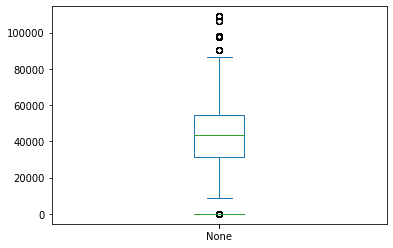

In [ ]:

print(df_num.info())
sum_rates = df[["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]].sum(axis=1)
print(sum_rates>100)
sum_rates.plot.box()
df.int_corr.plot.box()
df.income.plot.box()

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="distance")
df_new = pd.DataFrame(imputer.fit_transform(df_num), columns = df_num.columns)
df_new[intCols] = round(df_new[intCols])
sum_rates = df[["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]].sum(axis=1)
print(sum_rates>100)
sum_rates.plot.box()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
train = df_new.copy()
pd.set_option('max_colwidth', 1000)
pd.set_option("display.max_columns",70)
train.dtypes

iid_pid     float64
iid         float64
id          float64
gender      float64
idg         float64
condtn      float64
wave        float64
round       float64
position    float64
positin1    float64
order       float64
partner     float64
pid         float64
match       float64
int_corr    float64
samerace    float64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o       float64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
age         float64
field_cd    float64
race        float64
imprace     float64
imprelig    float64
zipcode     float64
income      float64
goal        float64
date        float64
go_out      float64
career_c    float64
sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64


In [ ]:
train.head()

,iid_pid,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,age,field_cd,race,imprace,imprelig,zipcode,income,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,6804.0,453.0,14.0,1.0,24.0,2.0,17.0,11.0,2.0,14.0,1.0,10.0,439.0,0.0,0.48,0.0,29.0,2.0,20.0,10.0,50.0,5.0,10.0,5.0,0.0,3.0,10.000000,10.000000,3.000000,10.000000,0.000000,27.0,1.0,4.0,4.0,3.0,210009.0,37881.0,2.0,6.0,5.0,1.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,1.0,30.0,30.0,30.0,5.0,0.0,5.0
1,6803.0,453.0,14.0,1.0,24.0,2.0,17.0,11.0,13.0,14.0,10.0,9.0,438.0,0.0,0.31,0.0,23.0,2.0,14.0,15.0,16.0,17.0,18.0,20.0,0.0,3.0,9.000000,10.000000,3.000000,10.000000,2.000000,27.0,1.0,4.0,4.0,3.0,210009.0,37881.0,2.0,6.0,5.0,1.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,1.0,30.0,30.0,30.0,5.0,0.0,5.0
2,6802.0,453.0,14.0,1.0,24.0,2.0,17.0,11.0,12.0,14.0,9.0,8.0,437.0,0.0,0.40,0.0,23.0,2.0,15.0,15.0,18.0,18.0,14.0,20.0,0.0,6.0,8.000000,10.000000,6.000000,9.000000,5.000000,27.0,1.0,4.0,4.0,3.0,210009.0,37881.0,2.0,6.0,5.0,1.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,1.0,30.0,30.0,30.0,5.0,0.0,5.0
3,6801.0,453.0,14.0,1.0,24.0,2.0,17.0,11.0,6.0,14.0,4.0,7.0,436.0,0.0,0.59,0.0,23.0,2.0,28.0,8.0,17.0,22.0,17.0,8.0,0.0,7.0,10.000000,8.000000,8.000000,8.000000,7.000000,27.0,1.0,4.0,4.0,3.0,210009.0,37881.0,2.0,6.0,5.0,1.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,1.0,30.0,30.0,30.0,5.0,0.0,5.0
4,6800.0,453.0,14.0,1.0,24.0,2.0,17.0,11.0,7.0,14.0,5.0,6.0,435.0,0.0,-0.17,0.0,22.0,1.0,25.0,5.0,20.0,25.0,15.0,10.0,0.0,2.0,9.404182,8.595818,7.404182,8.297909,6.404182,27.0,1.0,4.0,4.0,3.0,210009.0,37881.0,2.0,6.0,5.0,1.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,1.0,30.0,30.0,30.0,5.0,0.0,5.0


In [ ]:
train["nb"]= 1
train = train.dropna(subset=["iid","pid"])
train[["iid","pid"]] = train[["iid","pid"]].apply(pd.to_numeric, downcast="integer", errors='coerce')
train["duo"] = np.where(train["iid"] > train["pid"], train["iid"].astype(str) + "_" + train["pid"].astype(str), train["pid"].astype(str) + "_" + train["iid"].astype(str))
train.to_csv("trainClean.csv", index=False)

In [ ]:
train[["iid", "wave"]].drop_duplicates()["wave"].value_counts().sort_values(ascending=False)

11.0    42
9.0     40
14.0    38
15.0    37
4.0     36
2.0     35
7.0     32
12.0    28
17.0    24
8.0     20
3.0     20
1.0     20
5.0     19
13.0    19
10.0    18
16.0    14
6.0     10
Name: wave, dtype: int64

In [ ]:
print(train.drop_duplicates("duo")["match"].value_counts())
train.drop_duplicates("duo")["match"].value_counts(normalize=True)

0.0    2830
1.0     568
Name: match, dtype: int64


0.0    0.832843
1.0    0.167157
Name: match, dtype: float64

In [ ]:
print(train.drop_duplicates("iid")["gender"].value_counts())
train.drop_duplicates("iid")["gender"].value_counts(normalize=True)

1.0    227
0.0    225
Name: gender, dtype: int64


1.0    0.502212
0.0    0.497788
Name: gender, dtype: float64

In [ ]:
dataQ4 = pd.crosstab(train.order, train.match, train.nb, aggfunc="sum", normalize='index').reset_index()
dataQ4.columns = ["order", "no", "yes"]
print(dataQ4)
from scipy.stats import pearsonr
pearsonr(dataQ4.order, dataQ4.yes)
#Plus l'ordre est grand moins il y a de match, significatif

    order        no       yes
0     1.0  0.763274  0.236726
1     2.0  0.831858  0.168142
2     3.0  0.827434  0.172566
3     4.0  0.800885  0.199115
4     5.0  0.811947  0.188053
5     6.0  0.832579  0.167421
6     7.0  0.841014  0.158986
7     8.0  0.836406  0.163594
8     9.0  0.810748  0.189252
9    10.0  0.820000  0.180000
10   11.0  0.848993  0.151007
11   12.0  0.885906  0.114094
12   13.0  0.855705  0.144295
13   14.0  0.865772  0.134228
14   15.0  0.869231  0.130769
15   16.0  0.865385  0.134615
16   17.0  0.870813  0.129187
17   18.0  0.827751  0.172249
18   19.0  0.768657  0.231343
19   20.0  0.860000  0.140000
20   21.0  0.904762  0.095238


(-0.5145441064051263, 0.017006307029445174)

In [ ]:
train[["iid","sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing",
       "reading","tv","theater","movies","concerts","music","shopping","yoga"]].groupby(["iid"]).mean().mean().sort_values(ascending=False)

movies      7.926758
music       7.883751
dining      7.715241
reading     7.663324
museums     6.916273
concerts    6.783235
theater     6.755556
art         6.614061
sports      6.387414
exercise    6.365093
hiking      5.796694
clubbing    5.734735
shopping    5.569334
tv          5.289835
tvsports    4.519358
yoga        4.424717
gaming      3.856883
dtype: float64

In [ ]:
dataQ7 = train[["iid","attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1"]].groupby("iid").mean()

          attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1
attr1_1      1.00    -0.46     -0.38   -0.19   -0.47    -0.46
sinc1_1     -0.46     1.00     -0.10   -0.16    0.02     0.09
intel1_1    -0.38    -0.10      1.00   -0.14   -0.04    -0.06
fun1_1      -0.19    -0.16     -0.14    1.00   -0.04    -0.21
amb1_1      -0.47     0.02     -0.04   -0.04    1.00     0.17
shar1_1     -0.46     0.09     -0.06   -0.21    0.17     1.00


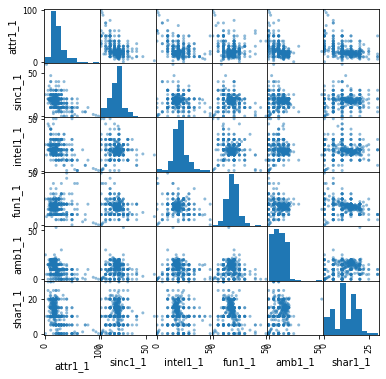

In [ ]:
corr = round(dataQ7.corr(),2)
print(corr)
pd.plotting.scatter_matrix(dataQ7, figsize=(6, 6))
plt.show()

In [ ]:
dataQ8 = train.drop_duplicates("duo")[["int_corr","match"]]
print(dataQ8.corr())
dataQ8["int_corrPred"] = np.where(dataQ8['int_corr']>=0, 1, 0)

          int_corr     match
int_corr  1.000000  0.026648
match     0.026648  1.000000


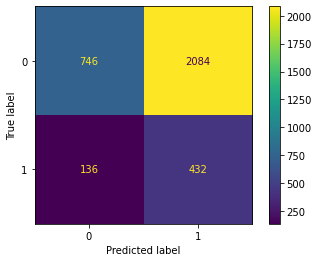

{'Accuracy': 0.3466745144202472, 'Precision': 0.17170111287758347, 'Sensitivity_recall': 0.7605633802816901, 'Specificity': 0.26360424028268553, 'F1_score': 0.28015564202334625}


In [ ]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(dataQ8["match"], dataQ8["int_corrPred"])).plot()
plt.show()
Accuracy = metrics.accuracy_score(dataQ8["match"], dataQ8["int_corrPred"])
Precision = metrics.precision_score(dataQ8["match"], dataQ8["int_corrPred"])
Sensitivity_recall = metrics.recall_score(dataQ8["match"], dataQ8["int_corrPred"])
Specificity = metrics.recall_score(dataQ8["match"], dataQ8["int_corrPred"], pos_label=0)
F1_score = metrics.f1_score(dataQ8["match"], dataQ8["int_corrPred"])
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

In [ ]:
field_txt = {1 :"Law", 2 : "Math", 3 : "Social Science, Psychologist", 4 : "Medical Science, Pharmaceuticals, and Bio Tech", 5 : "Engineering", 6 : "English/Creative Writing/ Journalism",
7 : "History/Religion/Philosophy", 8 : "Business/Econ/Finance", 9 : "Education, Academia", 10 : "Biological Sciences/Chemistry/Physics", 11 : "Social Work", 12 : "Undergrad/undecided",
13 : "Political Science/International Affairs", 14 : "Film", 15 : "Fine Arts/Arts Administration", 16 : "Languages", 17 : "Architecture", 18 : "Other"}
train.replace({"field_cd" : field_txt}).field_cd.value_counts()

Business/Econ/Finance                             1676
Biological Sciences/Chemistry/Physics              846
Social Science, Psychologist                       671
Law                                                621
Political Science/International Affairs            604
Education, Academia                                575
Engineering                                        479
Social Work                                        364
English/Creative Writing/ Journalism               243
History/Religion/Philosophy                        229
Math                                               167
Film                                               111
Medical Science, Pharmaceuticals, and Bio Tech      93
Fine Arts/Arts Administration                       56
Languages                                           40
Undergrad/undecided                                 19
Architecture                                        10
Name: field_cd, dtype: int64

In [ ]:
#